In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
print(tf.__version__)

2.2.0


In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-29 03:37:43--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.45MB/s    in 65s     

2020-07-29 03:38:49 (4.74 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [4]:
# Ekstraksi file zip
import zipfile, os
local_zip = '/tmp/rockpaperscissors.zip'
referensi_zip = zipfile.ZipFile(local_zip, 'r')
referensi_zip.extractall('/tmp')
referensi_zip.close()

dir_base = '/tmp/rockpaperscissors/rps-cv-images'
dir_training = os.path.join(dir_base, 'training')
dir_validation = os.path.join(dir_base, 'validation')

In [5]:
#augmentasi gambar
datagen = ImageDataGenerator(validation_split=0.3,
                             rescale=1./255,
                             rotation_range=20,
                             horizontal_flip=True,
                             shear_range = 0.2,
                             fill_mode = 'nearest')

In [32]:
training_generator = datagen.flow_from_directory(dir_base,
                                                 target_size=(150,150),
                                                 batch_size=32,
                                                 subset='training', 
                                                 class_mode='categorical')

validation_generator = datagen.flow_from_directory(dir_base,
                                                   target_size=(150,150), 
                                                   batch_size=32,
                                                   subset='validation', 
                                                   class_mode='categorical')

Found 1533 images belonging to 3 classes.
Found 655 images belonging to 3 classes.


In [33]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'), # Hidden Layer
                                    tf.keras.layers.Dense(512, activation='relu'), # Hidden Layer
                                    tf.keras.layers.Dense(3, activation='softmax')
])

In [34]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [35]:
history = model.fit(training_generator,
          steps_per_epoch=25, # Berapa batch yang akan dieksekusi pada setiap epoch
          epochs=20,
          validation_data=validation_generator, # Menampilkan akurasi pengujian data validasi
          validation_steps=5, # Jumlah batch yang dieksekusi pada setiap epoch
          verbose=1)

Epoch 1/20
25/25 [==============================] - 46s 2s/step - loss: 1.1204 - accuracy: 0.3325 - val_loss: 1.0380 - val_accuracy: 0.6125
Epoch 2/20
25/25 [==============================] - 45s 2s/step - loss: 0.7615 - accuracy: 0.6926 - val_loss: 0.5538 - val_accuracy: 0.7937
Epoch 3/20
25/25 [==============================] - 45s 2s/step - loss: 0.4051 - accuracy: 0.8475 - val_loss: 0.4141 - val_accuracy: 0.8625
Epoch 4/20
25/25 [==============================] - 46s 2s/step - loss: 0.2790 - accuracy: 0.8996 - val_loss: 0.3580 - val_accuracy: 0.8500
Epoch 5/20
25/25 [==============================] - 45s 2s/step - loss: 0.2400 - accuracy: 0.9184 - val_loss: 0.2214 - val_accuracy: 0.9375
Epoch 6/20
25/25 [==============================] - 46s 2s/step - loss: 0.1756 - accuracy: 0.9486 - val_loss: 0.1723 - val_accuracy: 0.9375
Epoch 7/20
25/25 [==============================] - 46s 2s/step - loss: 0.2716 - accuracy: 0.8946 - val_loss: 0.2494 - val_accuracy: 0.9125
Epoch 8/20
25/25 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


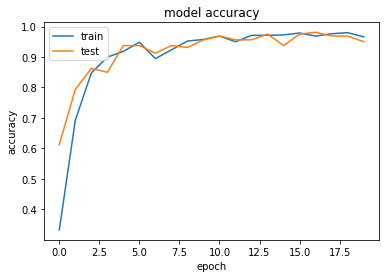

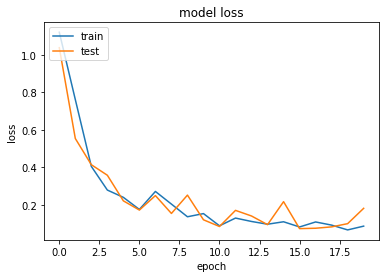

In [36]:
import matplotlib.pyplot as plt

print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Saving kCoX1GxQ9o2ZhRy9.png to kCoX1GxQ9o2ZhRy9.png
kCoX1GxQ9o2ZhRy9.png
scissors


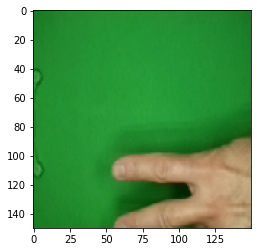

In [42]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0]==1:
    print("paper")
  elif classes[0][1]==1:
    print("rock")
  elif classes[0][2]==1:
    print("scissors")  
    